In [1]:
import pandas as pd 
import numpy as np 
import datetime 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')

In [3]:
# Basic checks
print(df.head())
print(df.tail())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [4]:
# Data cleaning - Opposition name says 'v Aus' etc, we can remove 'v '
df['opposition'] = df['opposition'].apply(lambda x: x[2:])

In [5]:
# Add a 'feature' - 'year' column using the match date column
# First convert date column into datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True) 
df['year'] = df['date'].dt.year.astype(int)
#print(df.head())

In [6]:
# Create a column to distinguish between out and not out

In [7]:
# The apply method in Pandas allows you to apply a function to each element in a DataFrame or Series. In this case, the function being applied is str, which is the built-in Python function for converting values into strings. By applying str to each element in the 'score' column, we are converting the numerical or other data types in that column into string data types.
df['score'] = df['score'].apply(str) 
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)

In [8]:
# dropping the odi_number feature because it adds no value to the analysis
df.drop(columns='odi_number', inplace=True)

In [9]:
# dropping those innings where Dhoni did not bat and storing in a new DataFrame 
# Take all the columns, starting with runs_scored
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored':]
#print(df_new.head())

In [10]:
# fixing the data types of numerical columns 
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int) 
df_new['strike_rate'] = df_new['strike_rate'].astype(float) 
df_new['fours'] = df_new['fours'].astype(int) 
df_new['sixes'] = df_new['sixes'].astype(int)

In [11]:
# Career stats
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y') # first match
print('First match:', first_match_date)
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y') # last match
print('Last match:', last_match_date)
number_of_matches = df.shape[0] # number of mathces played in career
print('Number of matches played:', number_of_matches)
number_of_inns = df_new.shape[0] # number of innings
print('Number of innings played:', number_of_inns)
not_outs = df_new['not_out'].sum() # number of not outs in career
print('Not outs:', not_outs)
runs_scored = df_new['runs_scored'].sum() # runs scored in career
print('Runs scored in career:', runs_scored)
balls_faced = df_new['balls_faced'].sum() # balls faced in career
print('Balls faced in career:', balls_faced)
career_sr = (runs_scored / balls_faced)*100 # career strike rate
print('Career strike rate: {:.2f}'.format(career_sr))
career_avg = (runs_scored / (number_of_inns - not_outs)) # career average
print('Career average: {:.2f}'.format(career_avg))
#highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(), 'date'].values[0]
#highest_score = df.loc[df.date == highest_score_date, 'score'].values[0] # highest score
highest_score = df_new['runs_scored'].max()
not_out_for_highest = (
    df_new[df_new['runs_scored'] == highest_score]['not_out']
    .replace([1, 0], ["*", ""])  # Replace 1 with *, 0 with null
    .iloc[0]
)
print('Highest score in career:', highest_score, not_out_for_highest)
hundreds = (df_new['runs_scored'] >= 100).sum()
# hundreds = df_new.loc[df_new['runs_scored'] >= 100].shape[0] # number of 100s
print('Number of 100s:', hundreds)
fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
# fifties = df_new.loc[(df_new['runs_scored']>=50)&(df_new['runs_scored']<100)].shape[0] #number of 50s
print('Number of 50s:', fifties)
fours = df_new['fours'].sum() # number of fours in career
print('Number of 4s:', fours)
sixes = df_new['sixes'].sum() # number of sixes in career
print('Number of 6s:', sixes)

First match: December 23, 2004
Last match: July 09, 2019
Number of matches played: 350
Number of innings played: 297
Not outs: 84
Runs scored in career: 10773
Balls faced in career: 12303
Career strike rate: 87.56
Career average: 50.58
Highest score in career: 183 *
Number of 100s: 10
Number of 50s: 73
Number of 4s: 826
Number of 6s: 229


Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: opposition, dtype: int64


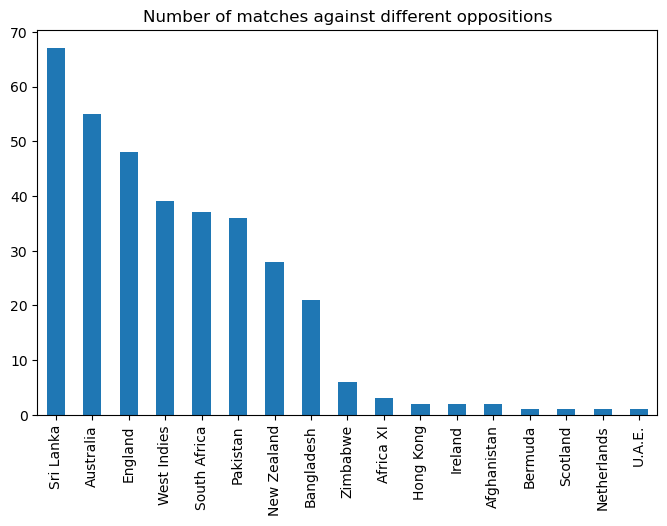

In [12]:
# number of matches played against different oppositions
# Count the occurrences of each unique value in the 'opposition' column
# opposition_counts will be a series with a labelled index as opposition
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)
# Plot the counts as a bar plot
opposition_counts.plot(kind='bar', title='Number of matches against different oppositions', figsize=(8, 5))
plt.show()